# Rz Rotation via Phase Gradient

In [1]:
from qualtran import Bloq, CompositeBloq, BloqBuilder, Signature, Register
from qualtran import QBit, QInt, QUInt, QAny
from qualtran.drawing import show_bloq, show_call_graph, show_counts_sigma
from typing import *
import numpy as np
import sympy
import cirq

## `RzViaPhaseGradient`
Apply a controlled-Rz using a phase gradient state.

Implements the following unitary action:

$$
    |\psi\rangle \otimes |x\rangle \mapsto \text{Rz}(4 \pi x) |\psi\rangle \otimes |x\rangle
$$

for every state $|\psi\rangle$ and every $x$, or equivalently

$$
    |b\rangle|x\rangle \mapsto |b\rangle e^{- (-1)^b i x/2} |x\rangle
$$

for every $b \in \{0, 1\}$ and every $x$.

To apply an $\text{Rz}(\theta) = e^{-i Z \theta/2}$, the angle register $x$ should store $\theta/(4\pi)$.

#### Parameters
 - `angle_dtype`: Data type for the `angle_data` register.
 - `phasegrad_dtype`: Data type for the phase gradient register. 

#### Registers
 - `q`: The qubit to apply Rz on.
 - `angle`: The rotation angle in radians.
 - `phase_grad`: The phase gradient register of sufficient width. 

#### References
 - [Compilation of Fault-Tolerant Quantum Heuristics for Combinatorial Optimization](https://arxiv.org/abs/2007.07391). Section II-C: Oracles for phasing by cost function. Appendix A: Addition for controlled rotations.


In [2]:
from qualtran.bloqs.rotations import RzViaPhaseGradient

### Example Instances

In [3]:
from qualtran import QFxp

rz_via_phase_gradient = RzViaPhaseGradient(angle_dtype=QFxp(4, 4), phasegrad_dtype=QFxp(4, 4))

#### Graphical Signature

In [4]:
from qualtran.drawing import show_bloqs
show_bloqs([rz_via_phase_gradient],
           ['`rz_via_phase_gradient`'])

### Call Graph

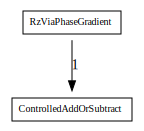

#### Counts totals:
 - `ControlledAddOrSubtract`: 1

In [5]:
from qualtran.resource_counting.generalizers import ignore_split_join
rz_via_phase_gradient_g, rz_via_phase_gradient_sigma = rz_via_phase_gradient.call_graph(max_depth=1, generalizer=ignore_split_join)
show_call_graph(rz_via_phase_gradient_g)
show_counts_sigma(rz_via_phase_gradient_sigma)